<a href="https://colab.research.google.com/github/orizay/free-fonts/blob/master/Pie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Mount Drive

In [1]:
from google.colab import drive
drive.mount('/MyData',force_remount= True)

Mounted at /MyData


In [2]:
!ls -al '/MyData/MyDrive/MyData'

total 9350784
-rw------- 1 root root    143130 Jul  3  2020  abalone_original.csv
-rw------- 1 root root      4756 Jul  7  2020  Advertising.csv
drwx------ 2 root root      4096 Aug  1  2020  All-CSV-ML-Data-Files-Download-master
-rw------- 1 root root       728 Jul 22  2020  enrollment_forecast.csv
-rw------- 1 root root      1729 Jul 23  2020  mtcars.csv
-rw------- 1 root root   1770221 Jul 31  2020  Superstore-Sales.csv
-rw------- 1 root root 783889122 Apr 27 01:41  TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Apr 27 01:42  TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Apr 27 01:41  TCS_영업소간통행시간_1시간_1개월_202003
-rw------- 1 root root 765531937 May 12 23:59  TCS_영업소간통행시간_1시간_1개월_202004
-rw------- 1 root root 824393600 May 13 00:02  TCS_영업소간통행시간_1시간_1개월_202005
-rw------- 1 root root 819232732 May 13 00:02  TCS_영업소간통행시간_1시간_1개월_202006
-rw

# 2.Korean Characters

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,536 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# 런타임 - 런타임 다시 시작
matplotlib의 폰트를 Nanum 폰트로 지정 

In [3]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [4]:
plt.rc('font', family='NanumBarunGothic')

# 3.Load Data

In [5]:
import pandas as pd

In [6]:
# Load a file under "data" folder
file ='/MyData/MyDrive/MyData/TCS_2020.csv'
data = pd.read_csv(file)

In [7]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,요일
0,20200101,4,101,105,2
1,20200101,4,101,105,2
2,20200101,4,101,105,2
3,20200101,4,101,105,2
4,20200101,4,101,105,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   요일       37356 non-null  int64
dtypes: int64(5)
memory usage: 1.4 MB


# 4.집계시

In [9]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [11]:
# Create data_06_23 Dataframe with counting by 집계시
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,요일
25164,20200302,6,101,110,0
22064,20200213,6,101,130,3
12199,20200130,6,101,115,3
6518,20200117,6,101,105,4
28006,20200309,6,101,115,0
...,...,...,...,...,...
15006,20200207,22,101,105,4
16139,20200209,22,101,130,6
28346,20200310,22,101,115,1
16141,20200209,22,101,130,6


In [12]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [13]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [14]:
# Store index of data_06_23_counting into x
x = data_06_22_counting.index

In [15]:
labels = [str(i) + '시' for i in x]

In [16]:
labels

['14시',
 '12시',
 '15시',
 '13시',
 '11시',
 '10시',
 '16시',
 '17시',
 '9시',
 '18시',
 '8시',
 '19시',
 '20시',
 '7시',
 '21시',
 '22시',
 '6시']

In [20]:
explode = [0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [21]:
# Store values of data_06_22_counting into values
values = data_06_22_counting.values

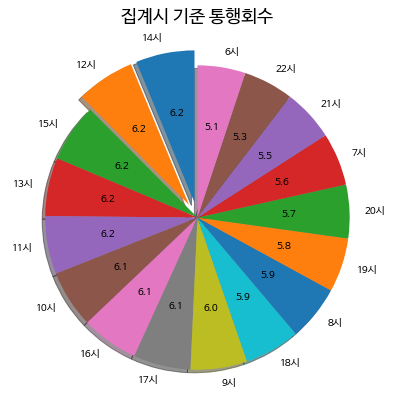

In [23]:
# Configure figure size
plt.figure(figsize=(7,7))

# Creae pie Chart
plt.pie(values, explode=explode, labels= labels,startangle= 90, shadow= True, autopct='%.1f')

# Generate labels and title
plt.title('집계시 기준 통행회수', fontsize= 18)

# Show plot
plt.show()

# 도착영업소코드

In [24]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [25]:
data_destination_counting

105    12274
110     9419
115     6509
140     2235
130     1972
135     1759
125     1677
120     1511
Name: 도착영업소코드, dtype: int64

In [26]:
# Store index of data_destination_counting into x
x = data_destination_counting.index

In [28]:
labels = [str(i) for i in x]

In [29]:
labels

['105', '110', '115', '140', '130', '135', '125', '120']

In [30]:
# 101,서울  105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
labels = ['기흥','목천','대전','부산','동김천','경주','남구미','황간']

In [31]:
explode = [0.2,0.1,0,0,0,0,0,0]

In [32]:
# Store values of data_destination_counting into values
values = data_destination_counting.values

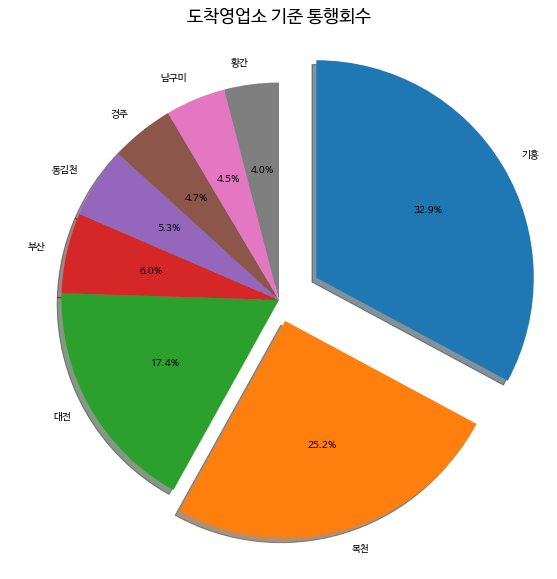

In [37]:
# Configure figure size
plt.figure(figsize=(10,10))

# Creae pie Chart
plt.pie(values, explode=explode, labels= labels,startangle= 90, shadow= True, autopct='%.1f%%',counterclock=False)

# Generate labels and title
plt.title('도착영업소 기준 통행회수', fontsize= 18)

# Show plot
plt.show()